In [ ]:
# Re-import necessary libraries after execution reset
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [1]:
# Re-load the dataset (user needs to re-upload the file)
df = pd.read_csv(f"../data/Top_12_German_Companies_Financial_Data.csv") # Load the dataset

# Filter dataset for SAP SE only
sap_df = df[df["Company"] == "SAP SE"].copy()

# Convert Period column to datetime format
sap_df["Period"] = pd.to_datetime(sap_df["Period"], format="%m/%d/%Y")

# Sort data by Period for proper time-series analysis
sap_df = sap_df.sort_values(by="Period")

# Set period as index
sap_df.set_index("Period", inplace=True)

# Convert revenue to numeric
sap_df["Revenue"] = pd.to_numeric(sap_df["Revenue"], errors="coerce")

# Define the revenue series
series = sap_df["Revenue"]

NameError: name 'pd' is not defined

In [ ]:
# Split data into train and test (80% train, 20% test)
split_index = int(len(series) * 0.8)
train, test = series[:split_index], series[split_index:]

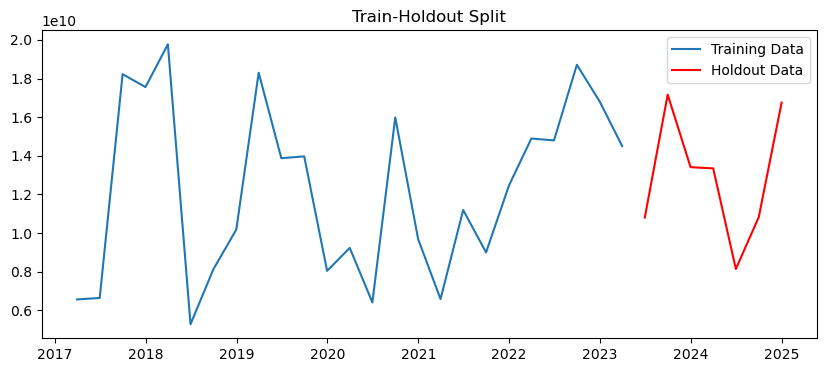

In [ ]:
# Plot train/holdout split
plt.figure(figsize=(10, 4))
plt.plot(train, label="Training Data")
plt.plot(test, label="Holdout Data", color="red")
plt.title("Train-Holdout Split")
plt.legend()
plt.show()

In [ ]:
printprint)))innjll

/opt/conda/envs/ai_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/conda/envs/ai_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/conda/envs/ai_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/conda/envs/ai_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/conda/envs/ai_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency inform

In [ ]:
# Compute performance metrics
optimized_mae = mean_absolute_error(test, optimized_predictions)
optimized_rmse = np.sqrt(mean_squared_error(test, optimized_predictions))
optimized_mape = mean_absolute_percentage_error(test, optimized_predictions)
optimized_r2 = r2_score(test, optimized_predictions)

# Compute MASE (Mean Absolute Scaled Error)
# Align test and naive forecast lengths before computing MASE
naive_forecast = test.shift(1).dropna()
test_aligned = test.loc[naive_forecast.index]  # Ensure matching length

# Compute MASE (Mean Absolute Scaled Error)
mase_denominator = mean_absolute_error(test_aligned, naive_forecast)
optimized_mase = optimized_mae / mase_denominator  # MASE formula

# Store results
metrics = {
    "Best SARIMA Order": best_cfg,
    "MAE": optimized_mae,
    "RMSE": optimized_rmse,
    "MAPE": optimized_mape,
    "MASE": optimized_mase,
    "R² Score": optimized_r2
}

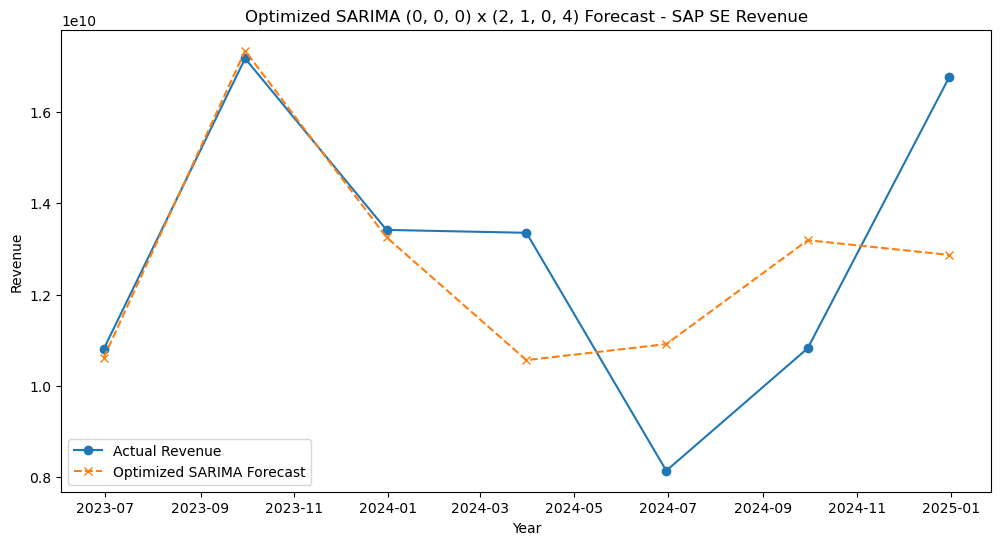

In [ ]:
# Plot optimized forecast vs actual
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label="Actual Revenue", marker="o")
plt.plot(test.index, optimized_predictions, label="Optimized SARIMA Forecast", linestyle="dashed", marker="x")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.title(f"Optimized SARIMA ({best_p}, {best_d}, {best_q}) x ({best_P}, {best_D}, {best_Q}, {S}) Forecast - SAP SE Revenue")
plt.legend()
plt.show()

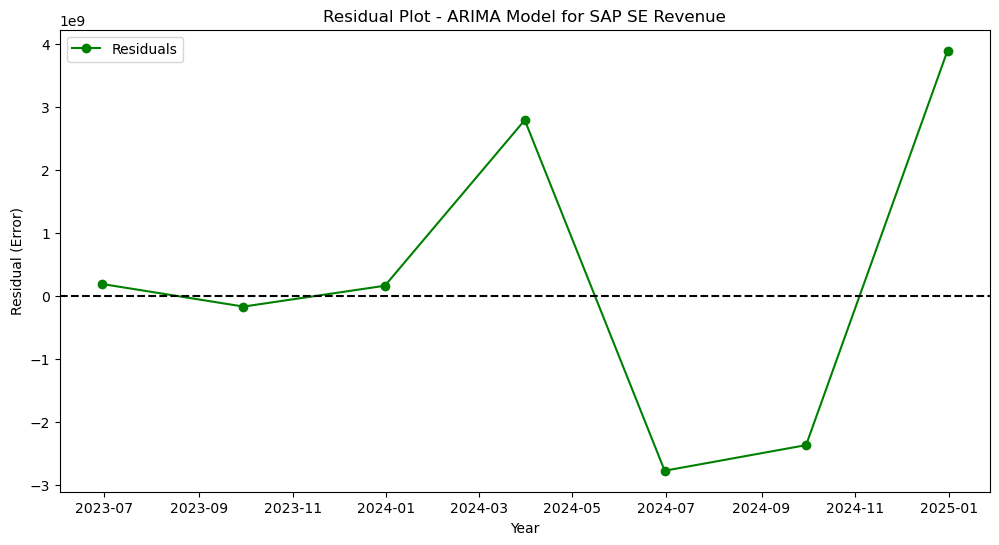

In [ ]:
# Plot Residuals to Check Model Fit
residuals = test - optimized_predictions

plt.figure(figsize=(12, 6))
plt.plot(test.index, residuals, label="Residuals", marker="o", color="green")
plt.axhline(y=0, color='black', linestyle="dashed")
plt.xlabel("Year")
plt.ylabel("Residual (Error)")
plt.title("Residual Plot - ARIMA Model for SAP SE Revenue")
plt.legend()
plt.show()

In [ ]:
print(metrics)

{'Best SARIMA Order': (0, 0, 0, 2, 1, 0), 'MAE': 1761382945.3972065, 'RMSE': np.float64(2275271761.536577), 'MAPE': 0.14841009997063503, 'MASE': 0.4404216236926463, 'R² Score': 0.44120127556684574}
